In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os


In [2]:
import imageio
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps, ImageFilter
import scipy.ndimage as ndi
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing import image
from keras.utils import plot_model

We can see that there are PNG and JPG images. Let's see how many.

In [6]:
jpg_counter = 0
png_counter = 0

for dirname, _, filenames in os.walk('C:/Users/hp/Downloads/archive/Chessman-image-dataset'):
    for filename in filenames:
        if filename[-3:] == "jpg":
            jpg_counter = jpg_counter + 1
        elif filename[-3:] == "png":
            png_counter = png_counter + 1

print("Number of jpg: {}\nNumber of png: {}".format(jpg_counter, png_counter))

Number of jpg: 465
Number of png: 69


In [7]:
dirname = 'C:/Users/hp/Downloads/archive/Chessman-image-dataset/Chess'
dir_chess_folders = os.listdir(dirname)
dir_chess_paths = [os.path.join(dirname, path) for path in dir_chess_folders]

In [8]:
dir_chess_paths

['C:/Users/hp/Downloads/archive/Chessman-image-dataset/Chess\\Bishop',
 'C:/Users/hp/Downloads/archive/Chessman-image-dataset/Chess\\King',
 'C:/Users/hp/Downloads/archive/Chessman-image-dataset/Chess\\Knight',
 'C:/Users/hp/Downloads/archive/Chessman-image-dataset/Chess\\Pawn',
 'C:/Users/hp/Downloads/archive/Chessman-image-dataset/Chess\\Queen',
 'C:/Users/hp/Downloads/archive/Chessman-image-dataset/Chess\\Rook']

Now we can prepare directories for image preprocessing.

In [9]:
os.mkdir('C:/Users/hp/Downloads/archive/chess')

os.mkdir('C:/Users/hp/Downloads/archive/chess/bishop')
os.mkdir('C:/Users/hp/Downloads/archive/chess/knight')
os.mkdir('C:/Users/hp/Downloads/archive/chess/queen')
os.mkdir('C:/Users/hp/Downloads/archive/chess/rook')
os.mkdir('C:/Users/hp/Downloads/archive/chess/king')
os.mkdir('C:/Users/hp/Downloads/archive/chess/pawn')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:/Users/hp/Downloads/archive/chess'

In [10]:
dirname_work = 'C:/Users/hp/Downloads/archive'

dir_work_chess = 'C:/Users/hp/Downloads/archive/chess'

bishop_path_work = 'C:/Users/hp/Downloads/archive/chess/bishop'

knight_path_work = 'C:/Users/hp/Downloads/archive/chess/knight'

queen_path_work = 'C:/Users/hp/Downloads/archive/chess/queen'

rook_path_work ='C:/Users/hp/Downloads/archive/chess/rook'

king_path_work = 'C:/Users/hp/Downloads/archive/chess/king'

pawn_path_work = 'C:/Users/hp/Downloads/archive/chess/pawn'


In [11]:
dir_chess_folders_work = os.listdir(dir_work_chess)
dir_chess_paths_work = [os.path.join(dir_work_chess, path) for path in dir_chess_folders_work]

In [12]:
def plot_imgs(item_dir, title=" ", num_imgs=4, cmap='viridis'):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(15, 15))
    for idx, img_path in enumerate(item_files):
        plt.subplot(8, 8, idx+1)
        img = plt.imread(img_path, 0)
        plt.title(title)
        plt.imshow(img, cmap=cmap)

    plt.tight_layout()

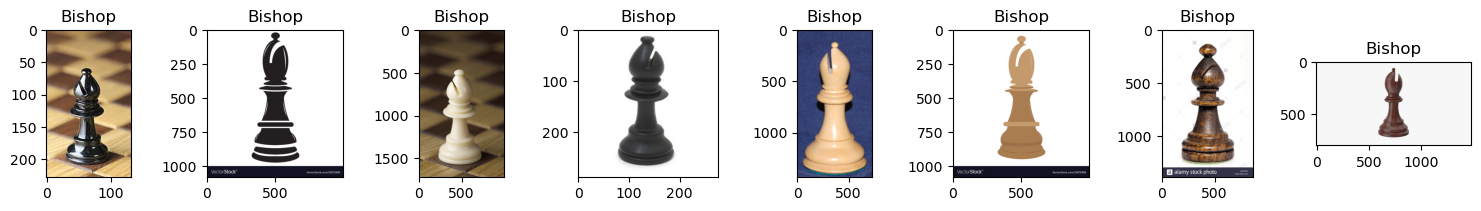

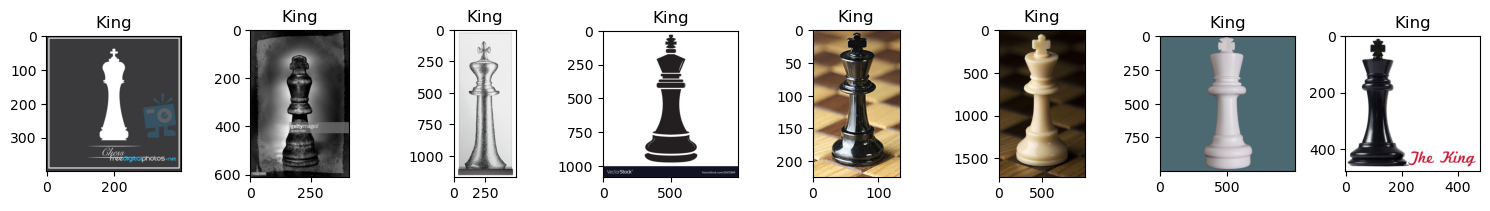

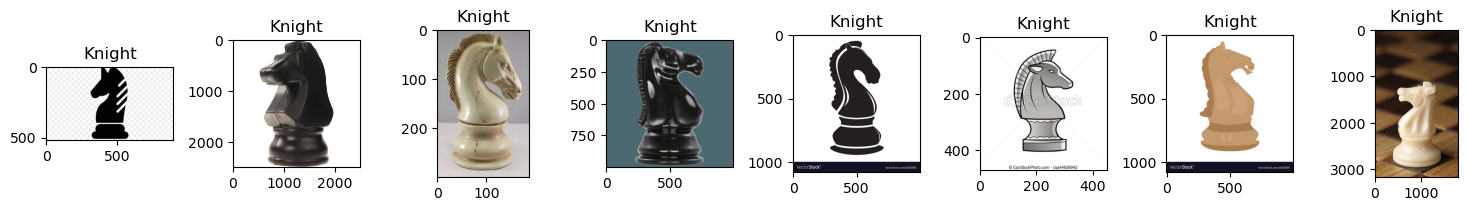

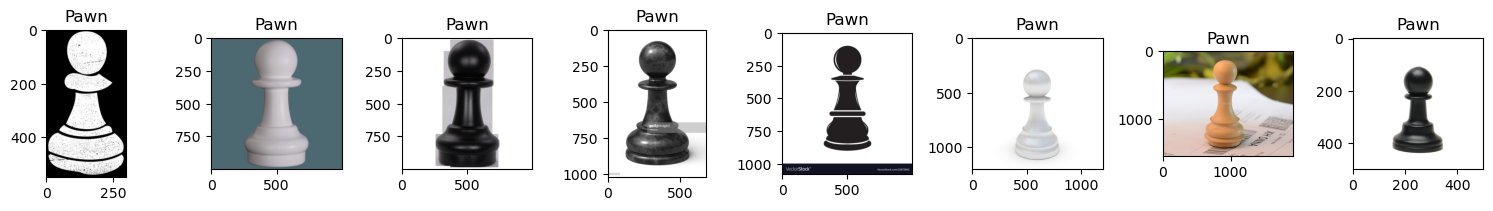

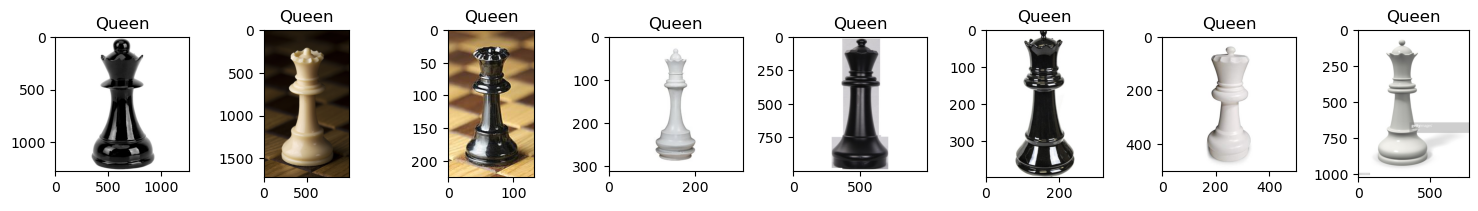

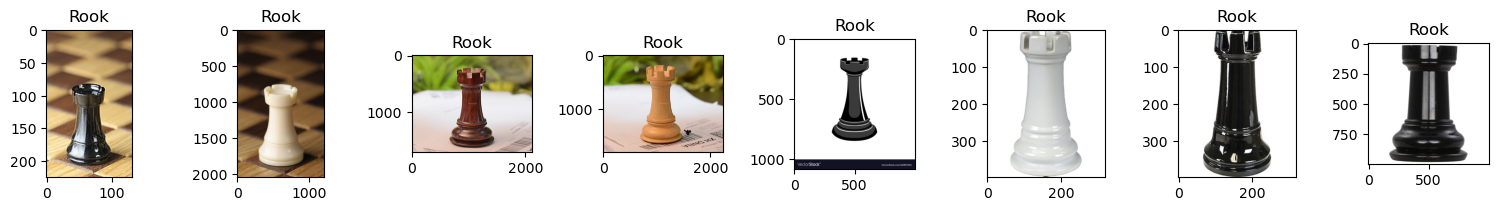

In [13]:
for path in dir_chess_paths:
    head, tail = os.path.split(path)
    plot_imgs(path, tail, 8)

Here we can see that pictures have various sizes. let's see how many pictures each class has.

In [14]:
chess_dic = {}
for path in dir_chess_paths:
    head, tail = os.path.split(path)
    chess_dic[tail] = len(os.listdir(path))

In [15]:
label_list = ["{}: {}".format(key, chess_dic[key]) for key in chess_dic]

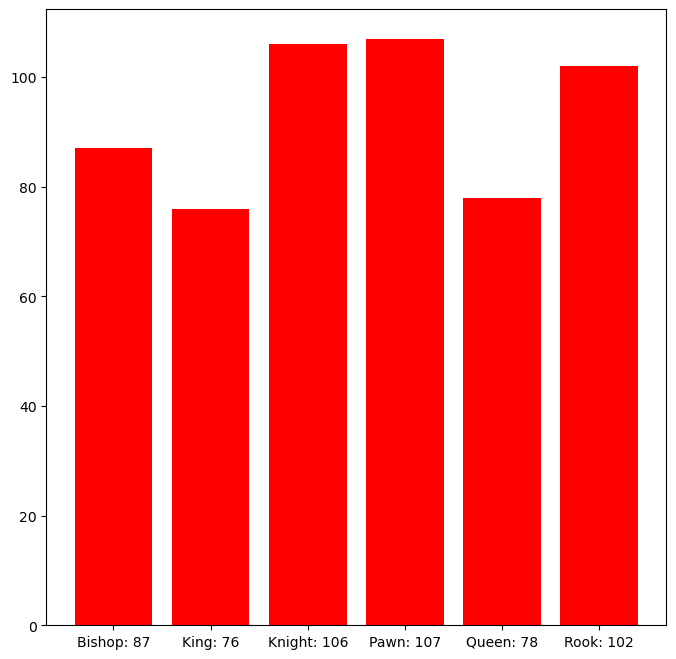

In [16]:
plt.figure(figsize=(8, 8))
plt.bar(range(len(chess_dic)), list(chess_dic.values()), color="red")
plt.xticks(range(len(chess_dic)), list(label_list))
plt.show();

Histograms:

In [17]:
def plot_img_hist(item_dir, num_img=6):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_img]

    #plt.figure(figsize=(10, 10))
    for idx, img_path in enumerate(item_files):
        fig1 = plt.figure(idx,figsize=(10, 10))
        fig1.add_subplot(2, 2, 1)
        img = mpimg.imread(img_path, 0)
        plt.imshow(img)
        fig1.add_subplot(2, 2, 2)
        plt.hist(img.ravel(),bins=256, fc='k', ec='k')

    plt.tight_layout()

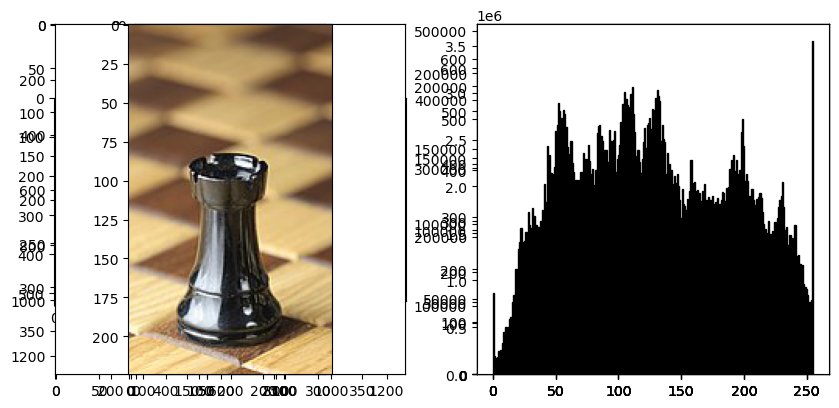

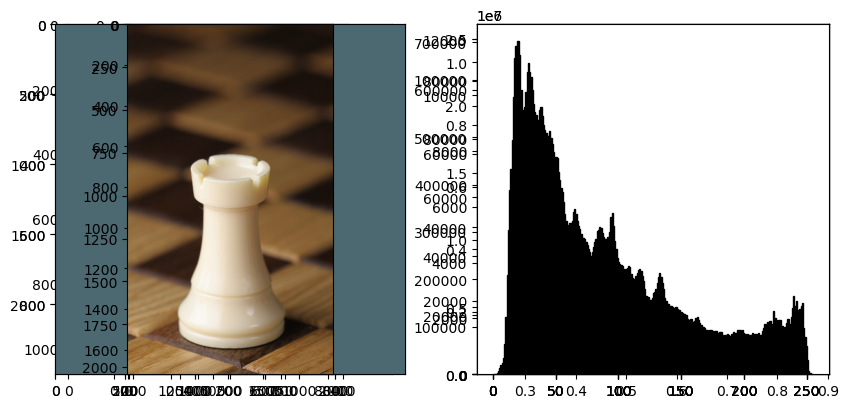

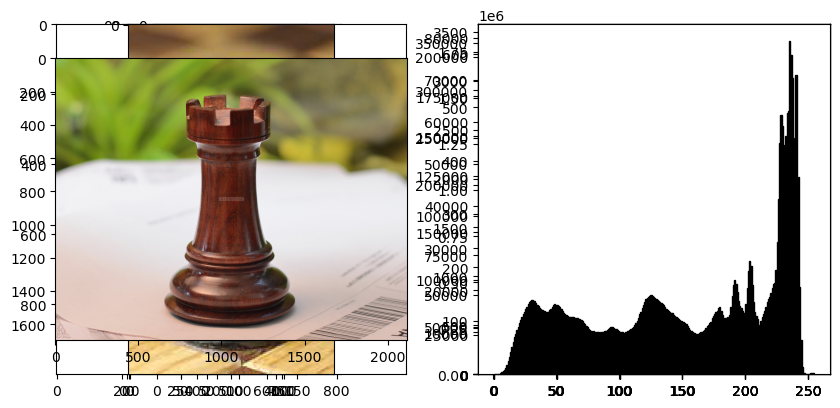

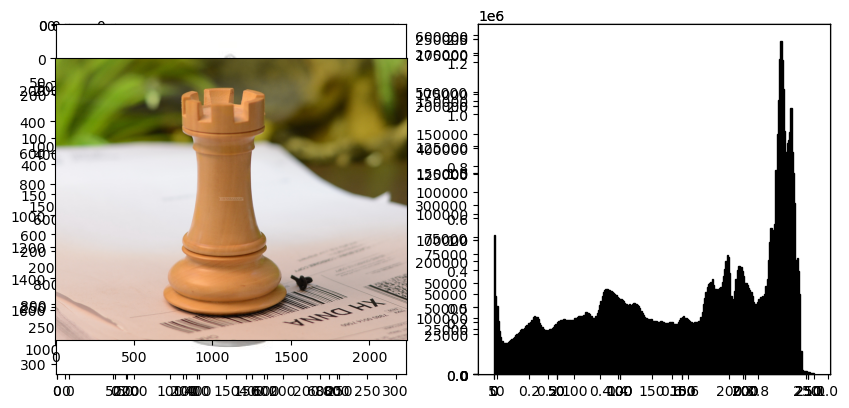

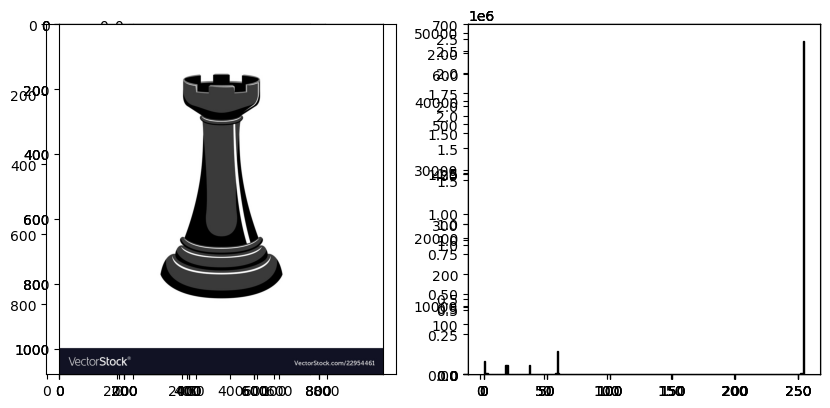

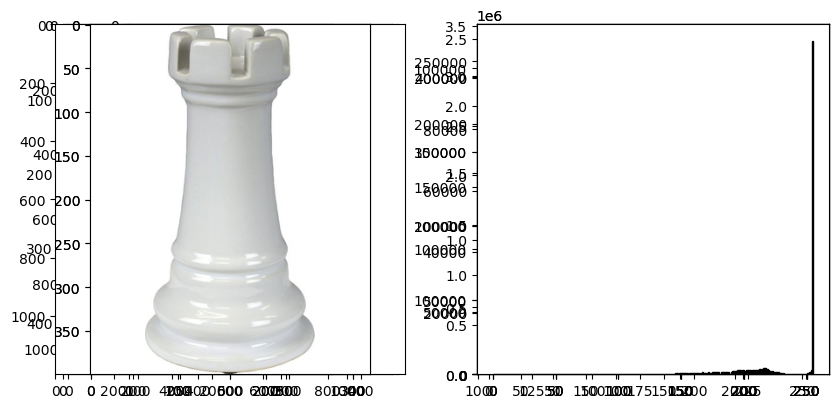

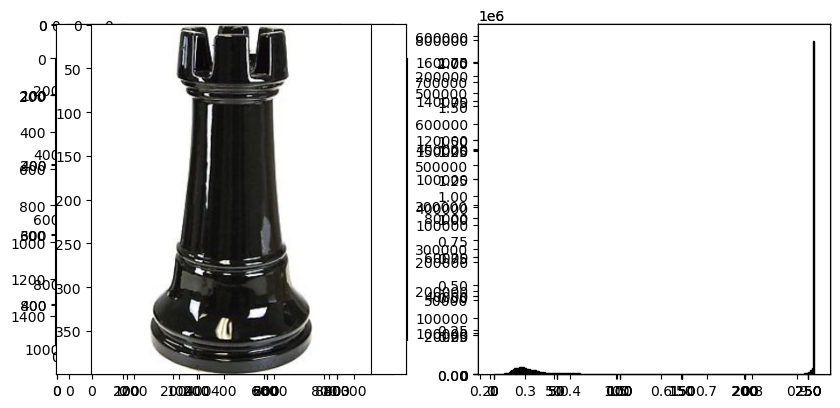

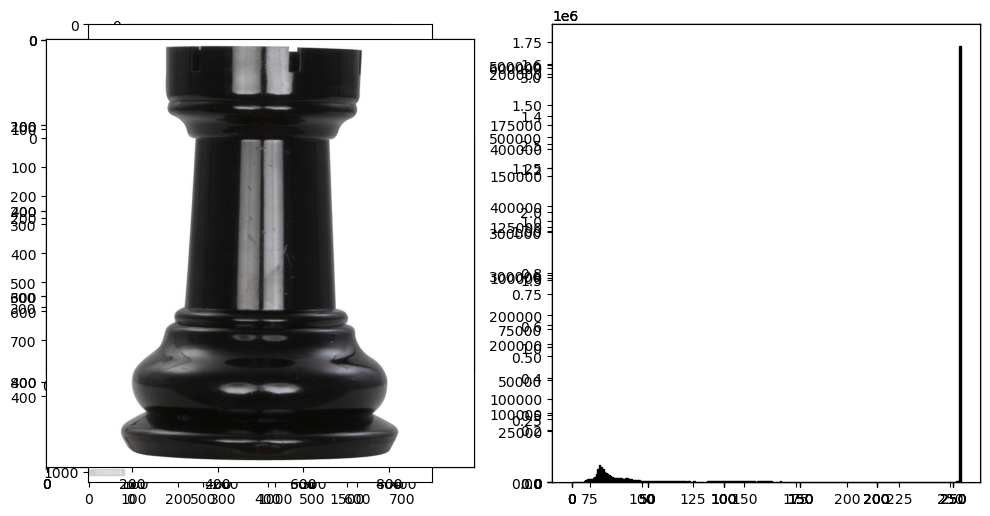

In [18]:
for path in dir_chess_paths:
    plot_img_hist(path, 8)

 converting all images into grayscale and equalizing all histograms. 

In [19]:
def image_binarization(path_from, path_to):

    i=1
    files = os.listdir(path_from)
    for file in files: 
        try:
            file_dir = os.path.join(path_from, file)
            file_dir_save = os.path.join(path_to, file)
            img = Image.open(file_dir)
            img = img.convert("1")
            img.save(file_dir_save) 
            i=i+1
        except:
            continue

In [20]:
image_binarization(dir_chess_paths[0], bishop_path_work)

In [21]:
image_binarization(dir_chess_paths[1], king_path_work)

In [22]:
image_binarization(dir_chess_paths[2], rook_path_work)

In [24]:
image_binarization(dir_chess_paths[3], pawn_path_work)

In [25]:
image_binarization(dir_chess_paths[4], queen_path_work)

In [26]:
image_binarization(dir_chess_paths[5], knight_path_work)

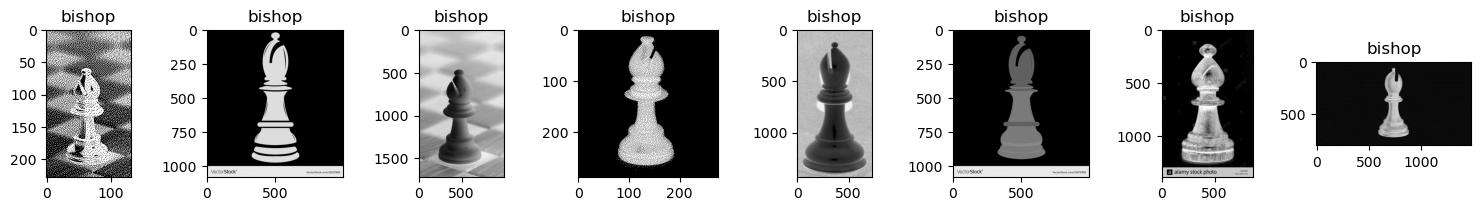

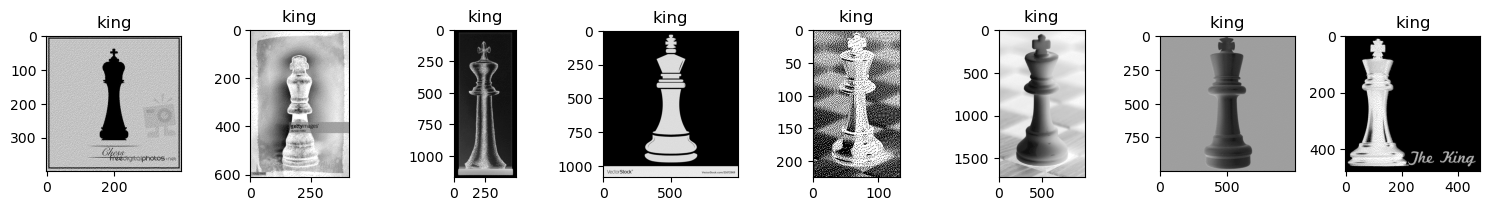

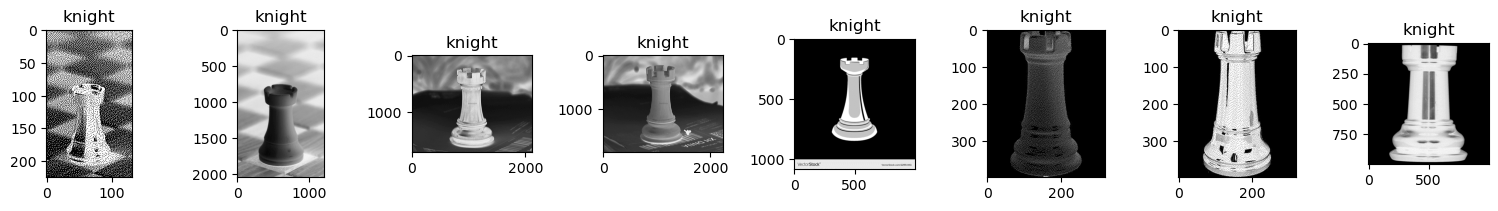

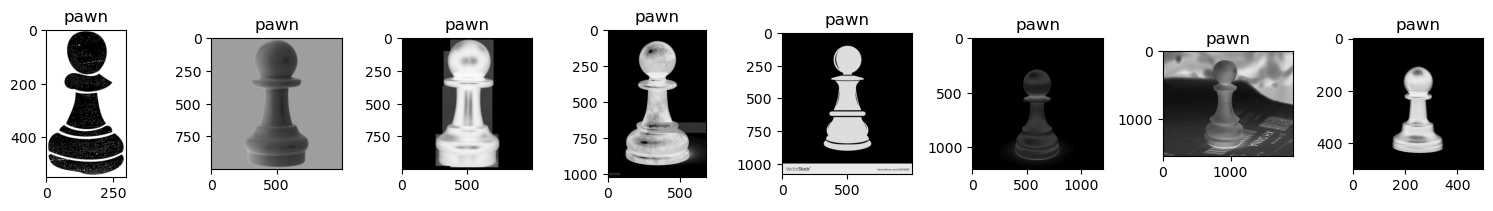

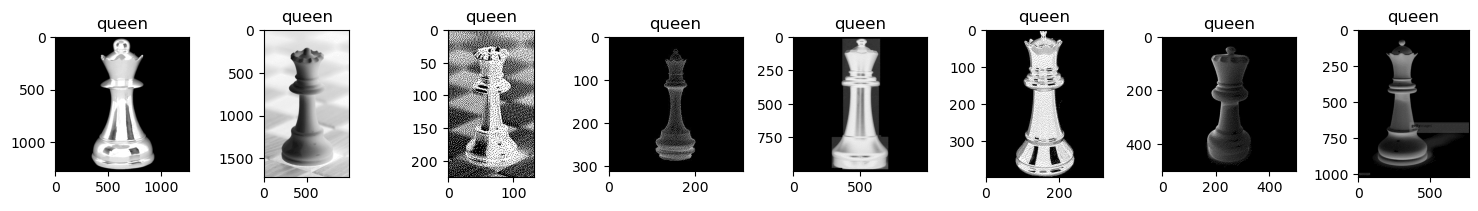

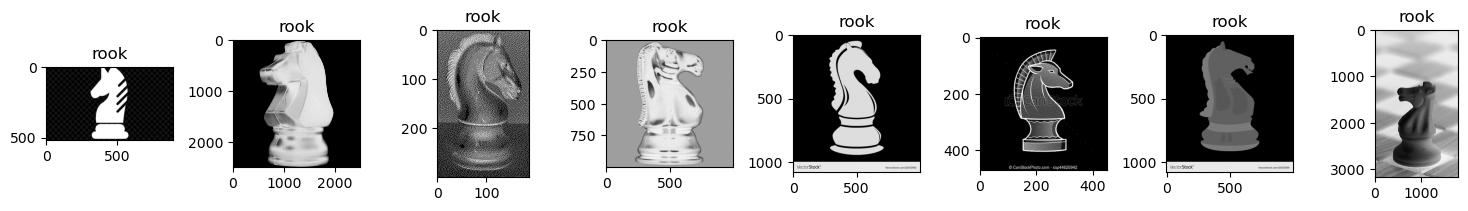

In [27]:
for path in dir_chess_paths_work:
    head, tail = os.path.split(path)
    plot_imgs(path, tail, 8, 'binary')

In [28]:
def image_median_filtering(path_from, path_to, window_size=3):

    i=1
    files = os.listdir(path_from)
    for file in files: 
        try:
            file_dir = os.path.join(path_from, file)
            file_dir_save = os.path.join(path_to, file)
            img = Image.open(file_dir)
            img = img.filter(ImageFilter.MedianFilter(window_size))
            img.save(file_dir_save) 
            i=i+1
        except:
            continue

In [29]:
image_median_filtering(bishop_path_work, bishop_path_work)

In [30]:
image_median_filtering(king_path_work, king_path_work)

In [31]:
image_median_filtering(rook_path_work, rook_path_work)

In [32]:
image_median_filtering(pawn_path_work, pawn_path_work)

In [33]:
image_median_filtering(queen_path_work, queen_path_work)

In [34]:
image_median_filtering(knight_path_work, knight_path_work)

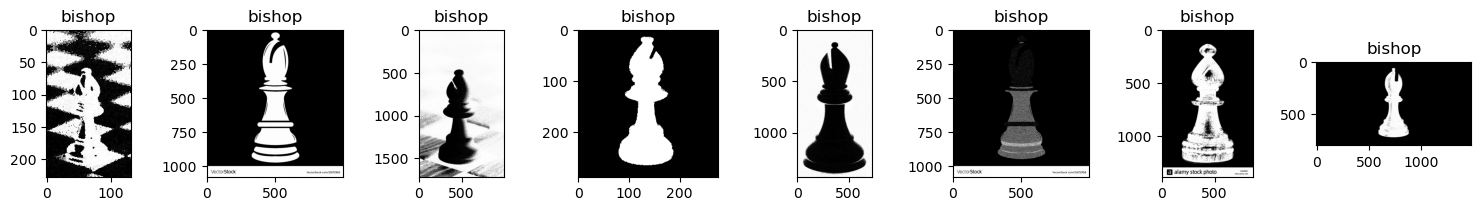

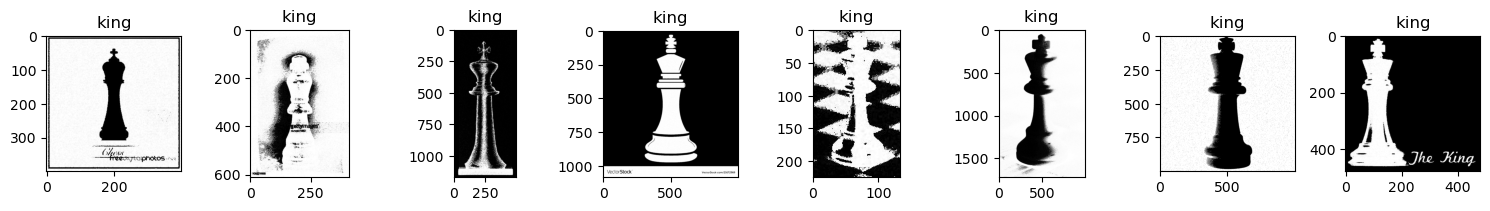

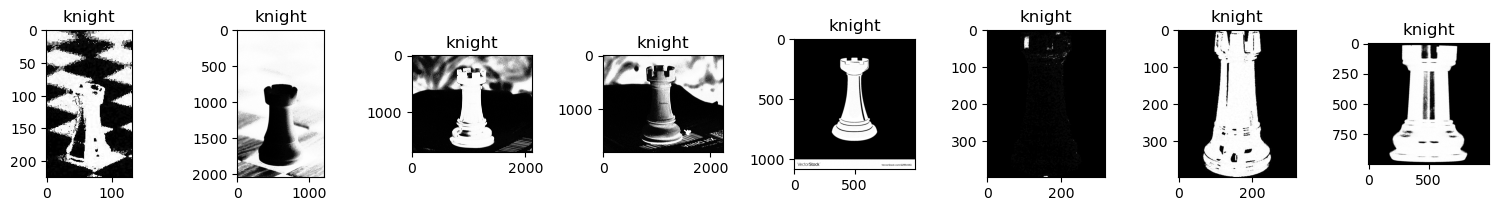

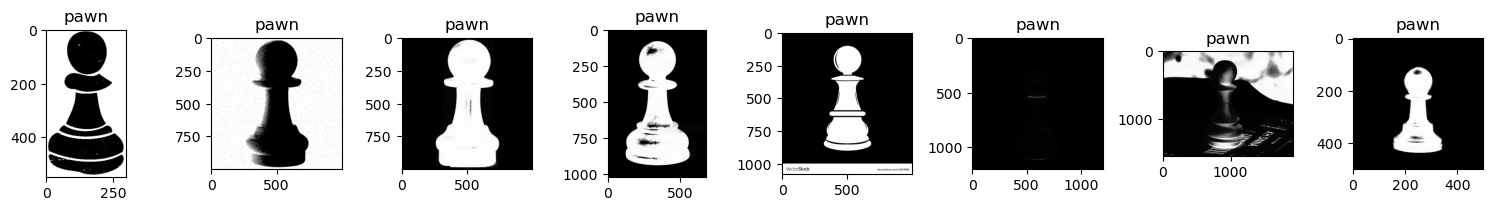

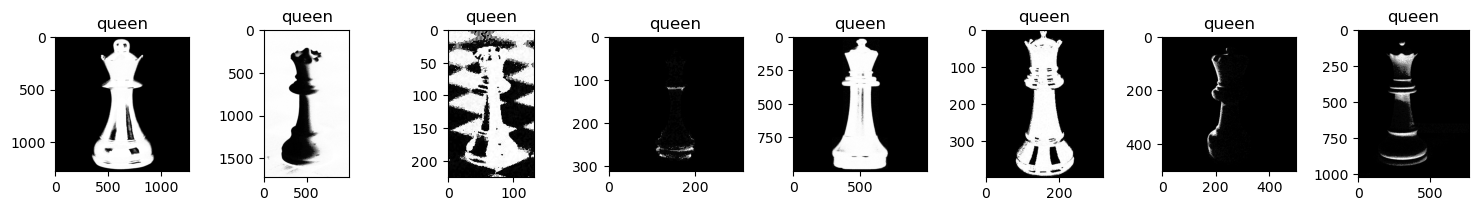

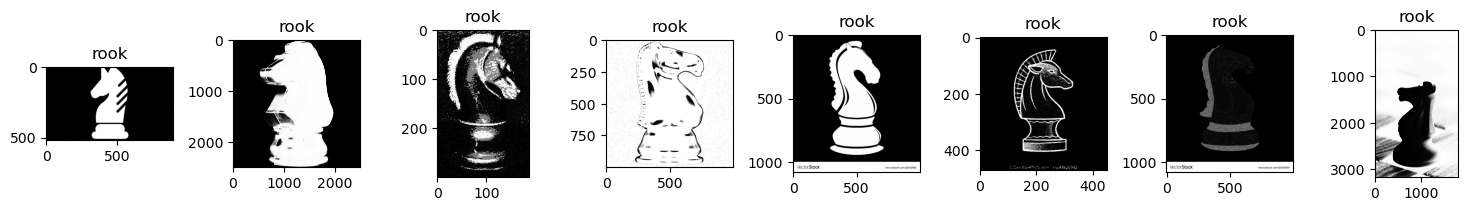

In [35]:
for path in dir_chess_paths_work:
    head, tail = os.path.split(path)
    plot_imgs(path, tail, 8, 'binary')

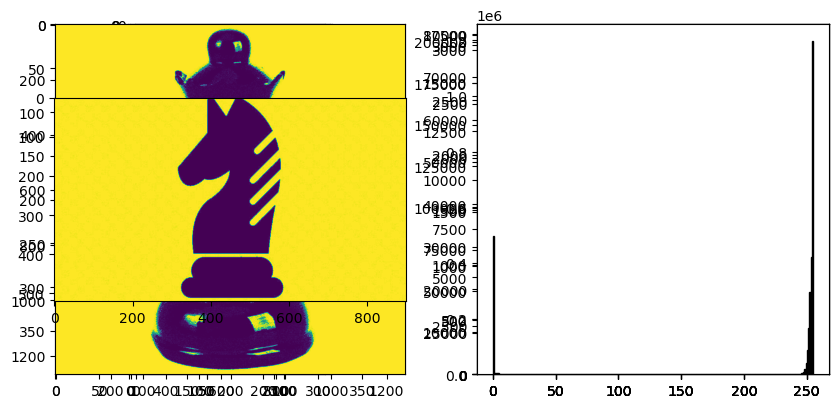

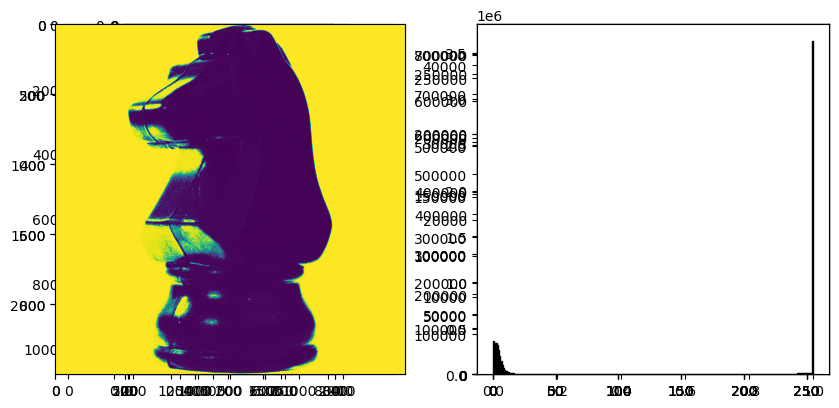

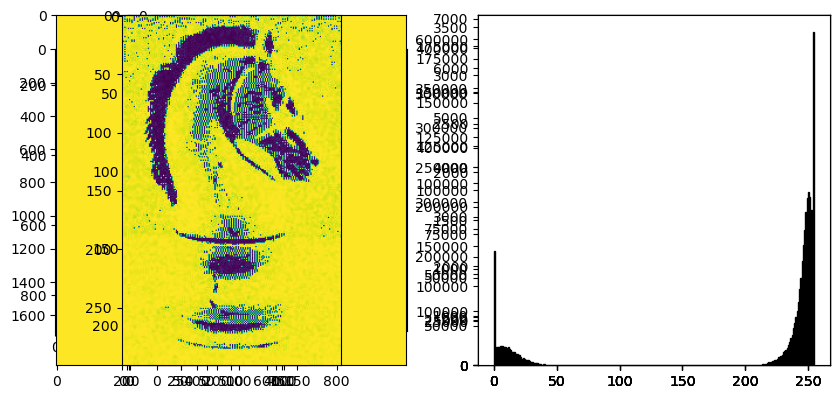

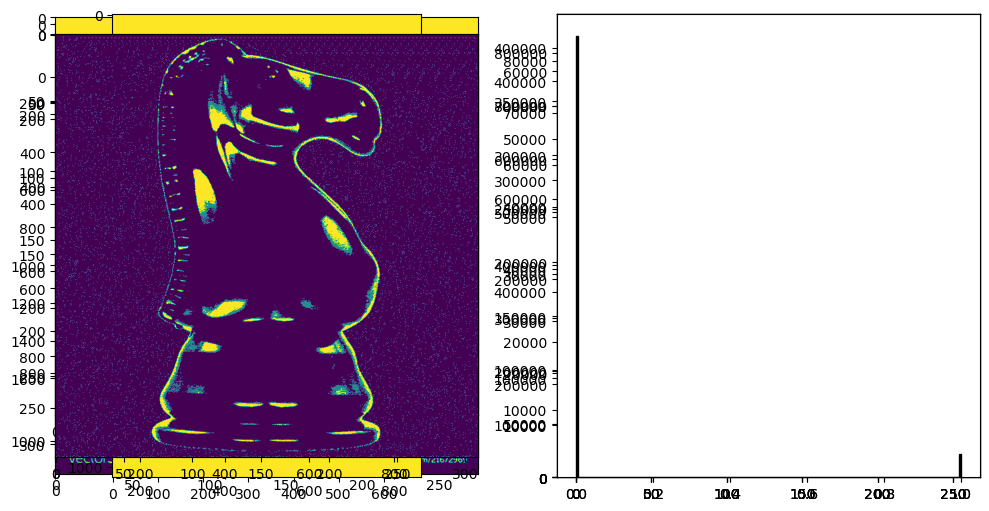

In [36]:
for path in dir_chess_paths_work:
    plot_img_hist(path, 4)

In [37]:
img_size_h = 300
img_size_w = 300

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3,
    rotation_range=90,
    width_shift_range=0.6,
    height_shift_range=0.6,
    shear_range=3, 
    zoom_range=50,
    horizontal_flip=True,
    vertical_flip=True)

In [39]:
input_shape = (img_size_h, img_size_w, 1) 

In [40]:
batch_size = 16
train_generator = train_datagen.flow_from_directory(
    dir_work_chess,
    target_size=(img_size_h, img_size_w),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True, #we shuffle our images for better performance
    seed=8)

validation_generator = train_datagen.flow_from_directory(
    dir_work_chess,
    target_size=(img_size_h, img_size_w),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=7)

Found 389 images belonging to 6 classes.
Found 162 images belonging to 6 classes.


In [42]:
model = Sequential([

    Conv2D(16, (5,5), input_shape=input_shape, padding='same', activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),

    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPool2D((2,2)),
    BatchNormalization(momentum=0.3),
    Dropout(0.2),
    
    Conv2D(32, (5,5), padding='same', activation='relu'),    
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),

    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPool2D((2,2)),
    BatchNormalization(momentum=0.3),
    Dropout(0.2),

    
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(6, activation='softmax')
    
    
])

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 300, 300, 16)      416       
                                                                 
 conv2d_9 (Conv2D)           (None, 300, 300, 32)      4640      
                                                                 
 conv2d_10 (Conv2D)          (None, 300, 300, 32)      9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 300, 300, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                      

In [44]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0005) 
callback = [learning_rate_reduction]

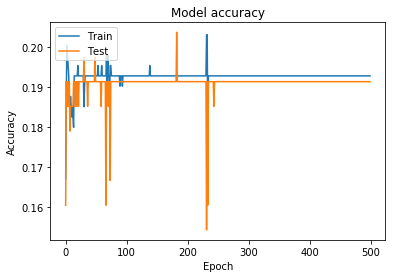

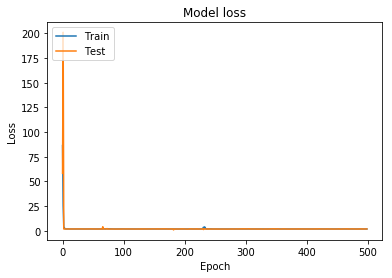

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

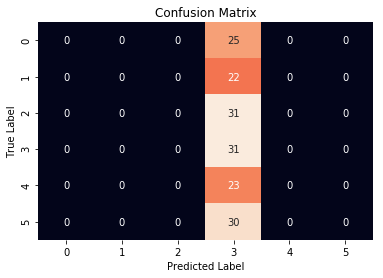

In [43]:
# Using: https://getaravind.com/blog/confusion-matrix-seaborn-heatmap/

sns.heatmap(matrix1,annot=True,cbar=False);
plt.ylabel('True Label');
plt.xlabel('Predicted Label');
plt.title('Confusion Matrix');

In [44]:
print('\nClassification Report')
target_names = ['Bishop',
                 'King',
                 'Rook',
                 'Pawn',
                 'Queen',
                 'Knight']
class_report = classification_report(validation_generator.classes, y_pred, target_names=target_names)
print(class_report)


Classification Report
              precision    recall  f1-score   support

      Bishop       0.00      0.00      0.00        25
        King       0.00      0.00      0.00        22
        Rook       0.00      0.00      0.00        31
        Pawn       0.19      1.00      0.32        31
       Queen       0.00      0.00      0.00        23
      Knight       0.00      0.00      0.00        30

    accuracy                           0.19       162
   macro avg       0.03      0.17      0.05       162
weighted avg       0.04      0.19      0.06       162



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
